In [1]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt

In [2]:
# # raw = mne.io.read_raw_fif(os.path.join(directory, subj), preload=True)

# raw_opened_1 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/AntBel/Anton_ec_21.08.edf", preload=True)
# raw_opened_2 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/AntBel/KarjaMokki/Anton_opened.edf", preload=True)

# raw_closed_1 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/AntBel/Anton_ec_21.08.edf", preload=True)
# raw_closed_2 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/AntBel/KarjaMokki/Anton_closed.edf", preload=True)

In [3]:
# raw = mne.io.read_raw_fif(os.path.join(directory, subj), preload=True)

raw_opened_1 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/MarMya/MarMya_stoyanki/MarMya_ec_before.edf", preload=True)
raw_opened_2 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/MarMya/MarMya_stoyanki/MarMya_KarjaMokki.edf", preload=True)

raw_closed_1 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/MarMya/MarMya_stoyanki/MarMya_ec_before.edf", preload=True)
raw_closed_2 = mne.io.read_raw_edf("C:/Users/Антон Белокопытов/Documents/GitHub/Kilpola/eeg_data/MarMya/MarMya_stoyanki/MarMya_KarjaMokki.edf", preload=True)

Extracting EDF parameters from C:\Users\Антон Белокопытов\Documents\GitHub\Kilpola\eeg_data\MarMya\MarMya_stoyanki\MarMya_ec_before.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 83999  =      0.000 ...   671.992 secs...
Extracting EDF parameters from C:\Users\Антон Белокопытов\Documents\GitHub\Kilpola\eeg_data\MarMya\MarMya_stoyanki\MarMya_KarjaMokki.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   727.992 secs...
Extracting EDF parameters from C:\Users\Антон Белокопытов\Documents\GitHub\Kilpola\eeg_data\MarMya\MarMya_stoyanki\MarMya_ec_before.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 83999  =      0.000 ...   671.992 secs...
Extracting EDF parameters from C:\Users\Антон Белокопытов\Documents\GitHub\Kilpola\eeg_data\MarMya\MarMya_stoyanki\MarMya_KarjaMokki.edf...
EDF file detected
Setting

In [4]:
## MarMya

# raws = [
#         raw_opened_1.copy().crop(
#                                  tmin=156-60, 
#                                  tmax=156+60
#                                 ),
    
#         raw_opened_2.copy().crop(
#                                  tmin=180-60, 
#                                  tmax=180+60
#                                  )
#        ]

raws = [
        raw_closed_1.copy().crop(
                                 tmin=491-60, 
                                 tmax=491+60
                                ),
    
        raw_closed_2.copy().crop(
                                 tmin=540-60, 
                                 tmax=540+60
                                 )
       ]

In [5]:
montage = mne.channels.make_standard_montage('standard_1020')

for raw in raws:
    raw = raw.set_montage(montage)

In [6]:
for raw in raws:
    raw.filter(2, 30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 207 samples (1.656 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 30

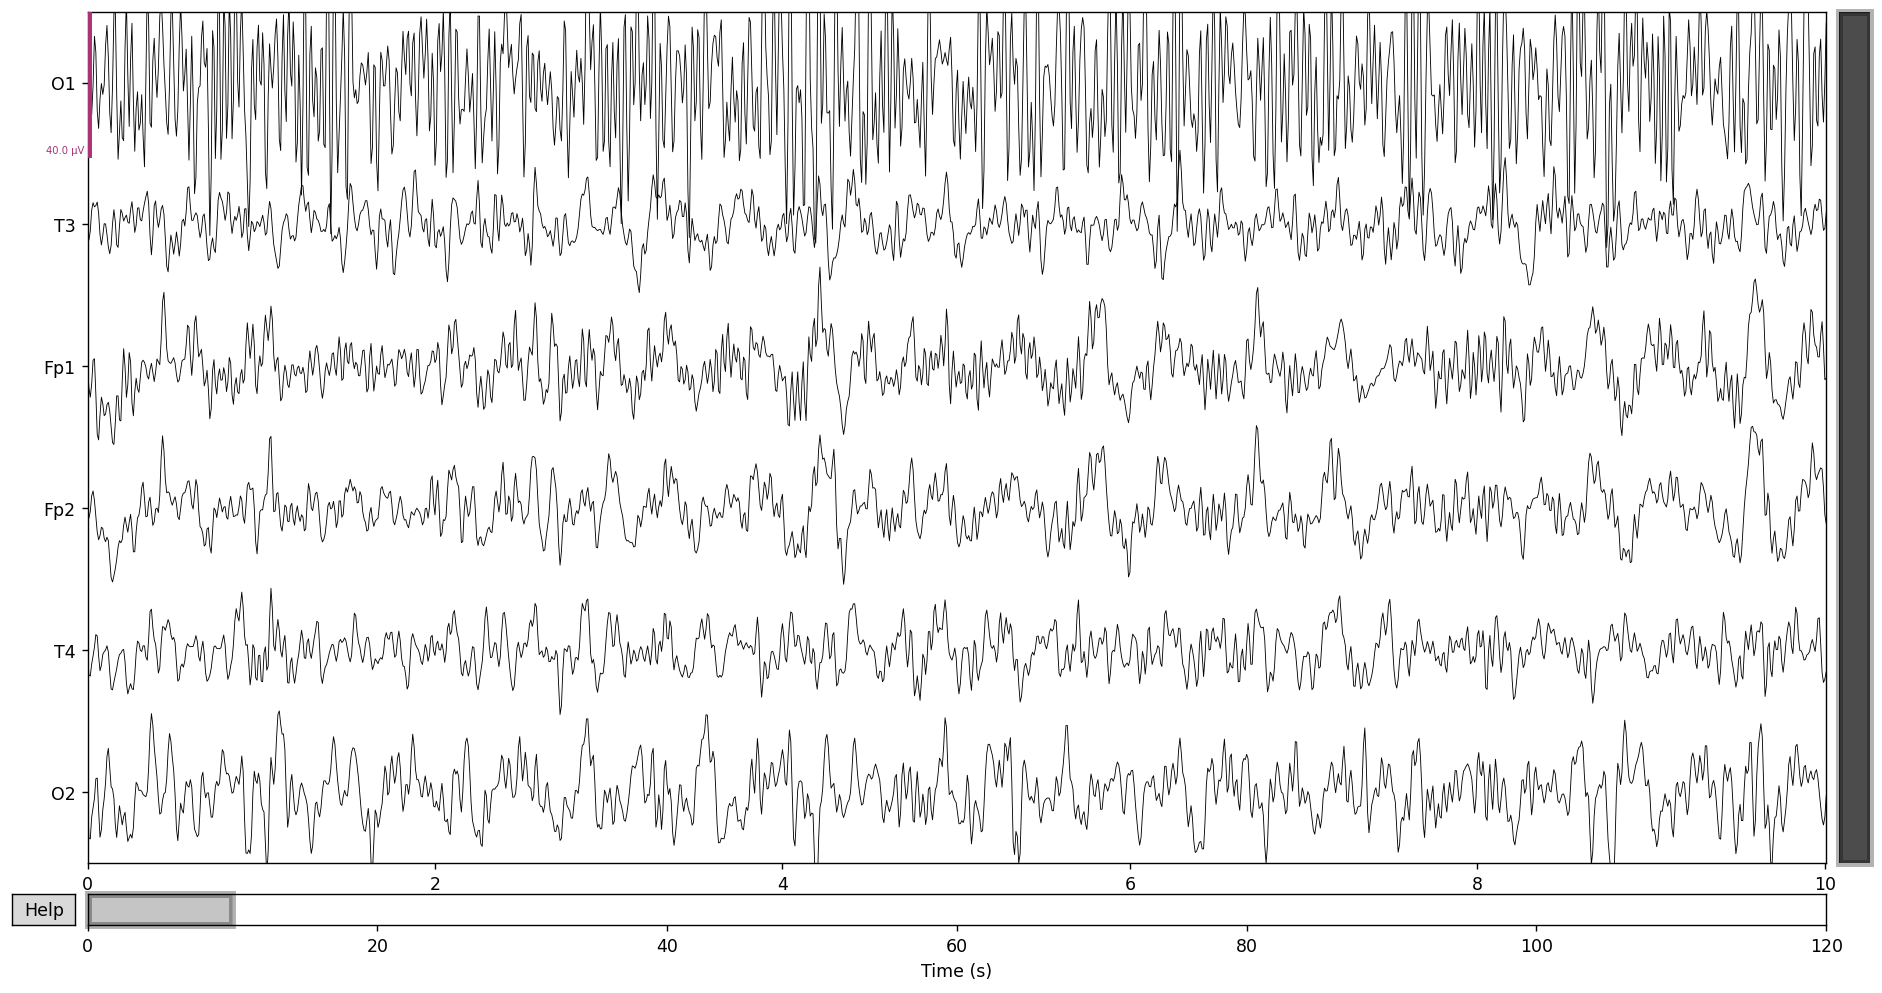

In [8]:
raws[1].plot()

In [9]:
for raw in raws:
    print(raw.info['bads'])

[]
['O1']


In [10]:
# Выполните интерполяцию
for raw in raws:
    raw.interpolate_bads()

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 135.5 mm
Computing interpolation matrix from 5 sensor positions
Interpolating 1 sensors


C:\Users\Антон Белокопытов\AppData\Local\Temp\ipykernel_12128\1882901776.py:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads()
C:\Users\Антон Белокопытов\AppData\Local\Temp\ipykernel_12128\1882901776.py:3: RuntimeWarning: Only 6 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  raw.interpolate_bads()
C:\Users\Антон Белокопытов\AppData\Local\Temp\ipykernel_12128\1882901776.py:3: RuntimeWarning: Estimated head radius (13.6 cm) is above the 99th percentile for adult head size.
  raw.interpolate_bads()
C:\Users\Антон Белокопытов\AppData\Local\Temp\ipykernel_12128\1882901776.py:3: RuntimeWarning: (X, Y) fit (-1.2, 29.7) more than 20 mm from head frame origin
  raw.interpolate_bads()


In [12]:
# for raw in raws:
#     raw.pick_channels(["O1", "Fp1", "Fp2", "O2"])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [11]:
all_epochs = []

for raw in raws:
    # Создание эпох фиксированной длины
    epochs = mne.make_fixed_length_epochs(raw, duration=1, preload=True)
    
    # Удаление плохих эпох по амплитуде
    reject_criteria = dict(eeg=50e-6)  # Порог в Вольтах (здесь 150 мкВ)
    epochs.drop_bad(reject=reject_criteria)
    
    all_epochs.append(epochs)

Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 120 events and 125 original time points ...
0 bad epochs dropped
    Rejecting  epoch based on EEG : ['O1', 'T4']
    Rejecting  epoch based on EEG : ['O1', 'T3']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'T3', 'Fp1', 'Fp2', 'T4']
    Rejecting  epoch based on EEG : ['O1', 'T3', 'T4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'T3', 'Fp1', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'T3', 'T4', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'T3']
    Rejecting  epoch based on EEG : ['T3']
    Rejecting  epoch based on EEG : ['O1', 'T3', 'T4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : [

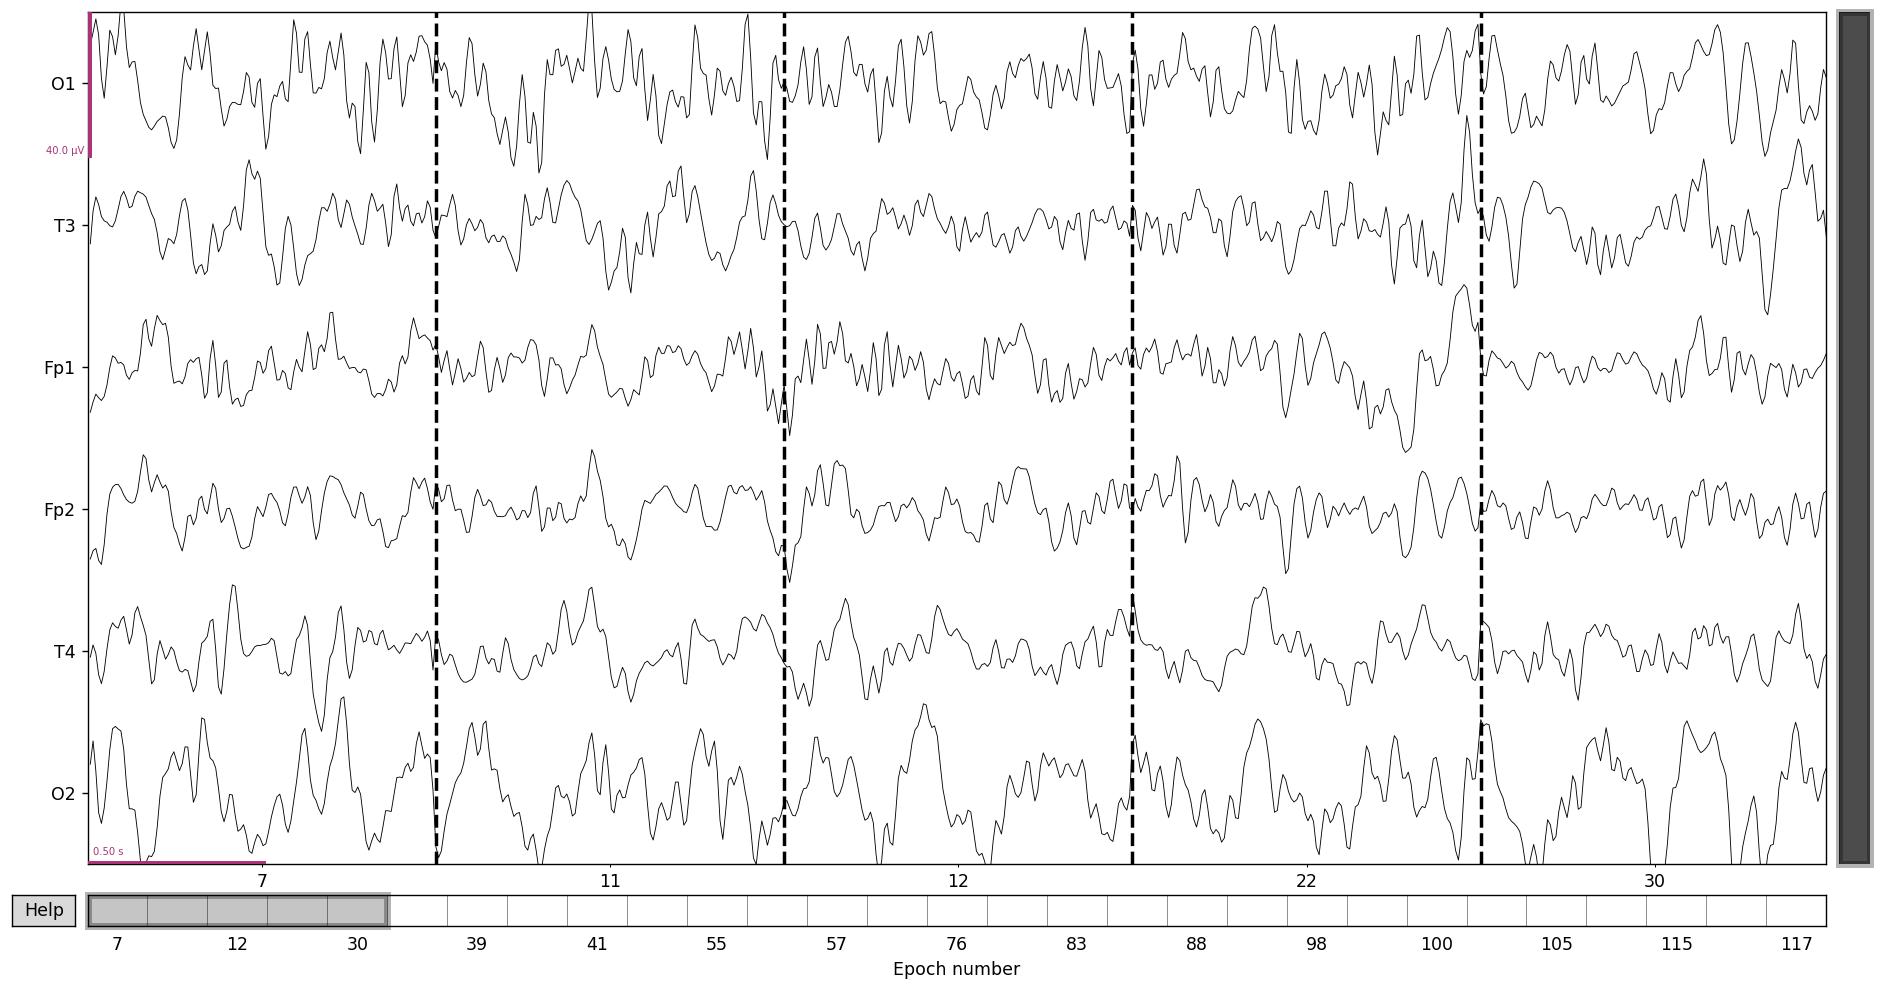

In [13]:
all_epochs[0].plot(n_epochs=5)

In [16]:
all_epochs[0]

Number of events,100
Events,1: 100
Time range,0.000 – 0.992 s
Baseline,off


Not setting metadata
133 matching events found
No baseline correction applied
Fitting ICA to data using 6 channels (please be patient, this may take a while)
Selecting by number: 6 components
Computing Extended Infomax ICA
Fitting ICA took 4.0s.


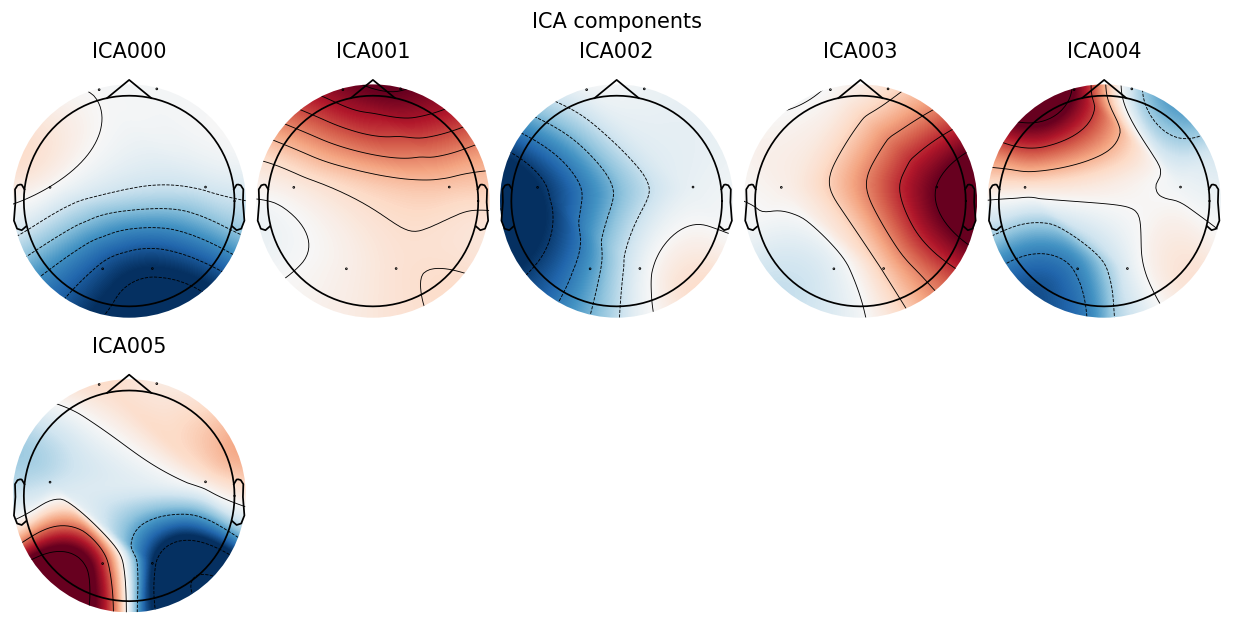

In [14]:
%matplotlib qt

# Шаг 2: Объединение всех эпох в один объект
concatenated_epochs = mne.concatenate_epochs(all_epochs)

# Шаг 3: Создание и подгонка ICA на объединённых эпохах
ica = mne.preprocessing.ICA(n_components=6, 
                            random_state=97, 
                            max_iter=800, 
                            method='infomax', 
                            fit_params=dict(extended=True))

# Применение ICA к объединённым эпохам
ica.fit(concatenated_epochs)

# Визуализация компонентов ICA
ica.plot_components()

Not setting metadata
133 matching events found
No baseline correction applied
0 projection items activated


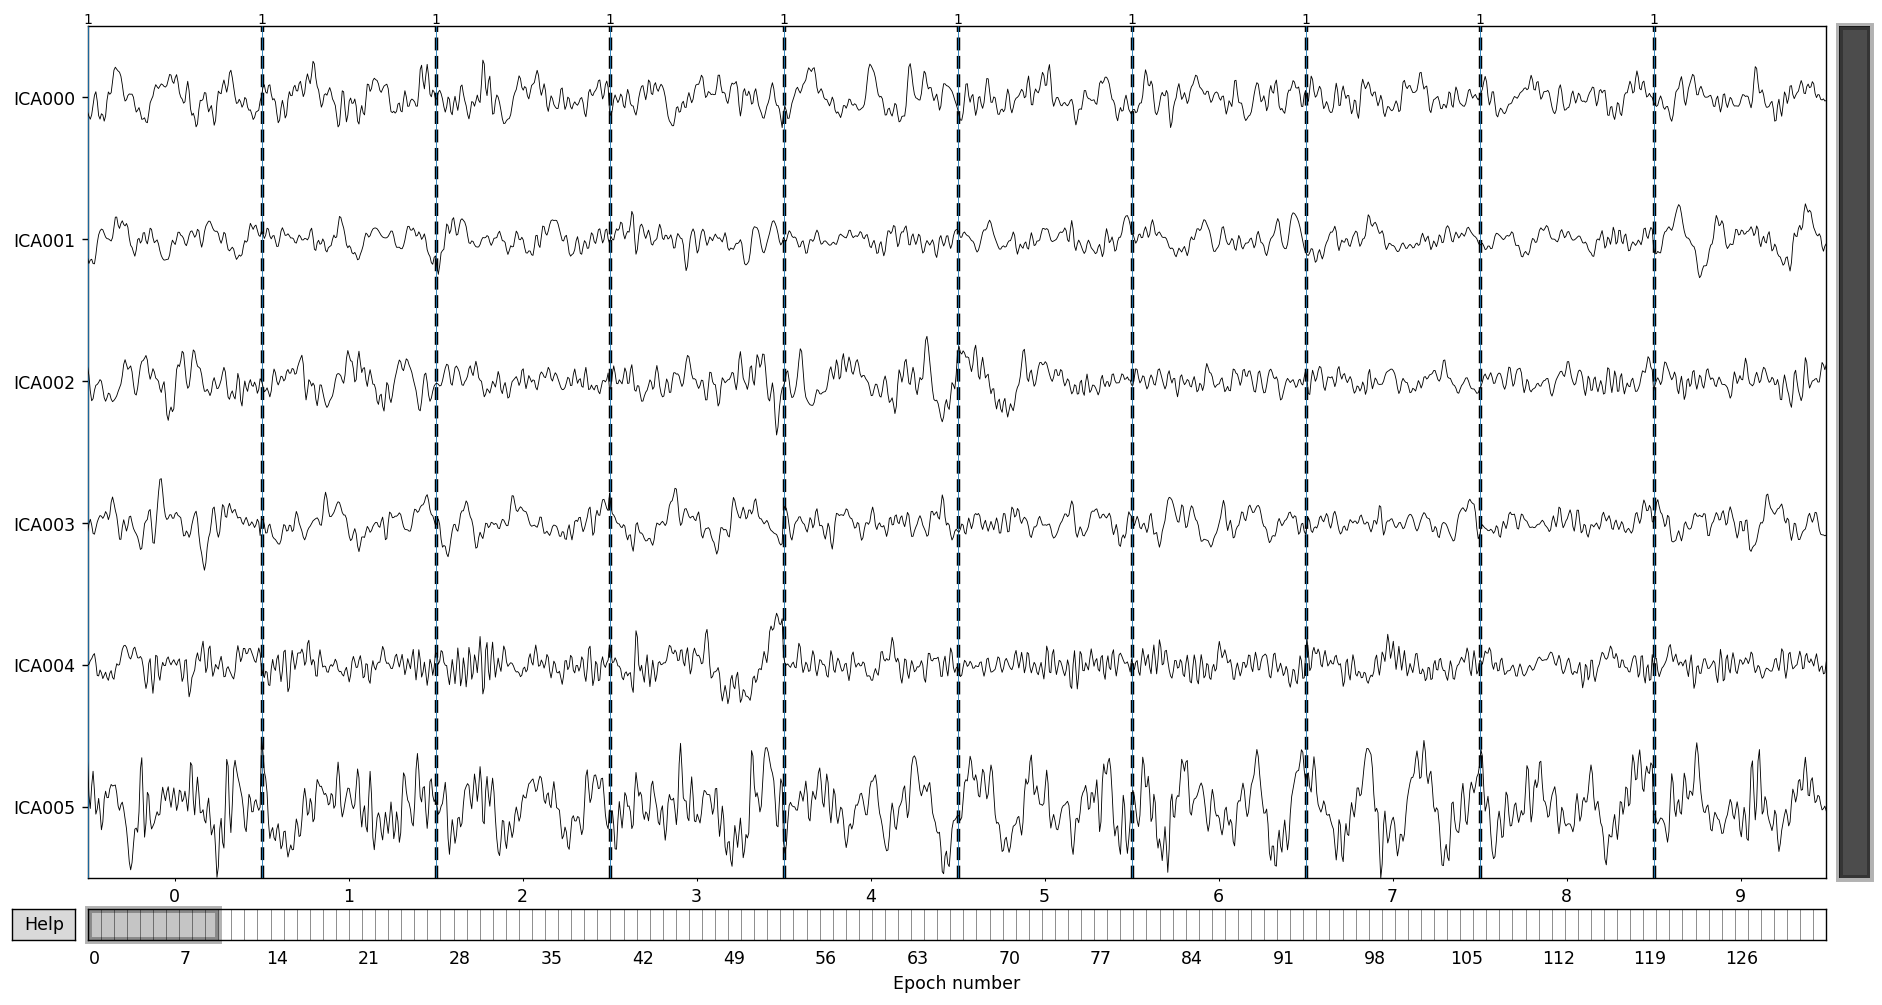

In [15]:
# Визуализация источников ICA
ica.plot_sources(concatenated_epochs, start=0, stop=10, show_scrollbars=True)

In [16]:
# Выбор артефактных компонентов вручную
# Например, допустим, что вы решили исключить компоненты 0 и 2:
ica.exclude = []  # Здесь вы вручную указываете номера артефактных компонентов

# Шаг 4: Применение ICA к каждому набору эпох после исключения артефактных компонентов
cleaned_epochs = []
for epochs in all_epochs:
    epochs_ica = ica.apply(epochs.copy())
    cleaned_epochs.append(epochs_ica)

Applying ICA to Epochs instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 6 PCA components
Applying ICA to Epochs instance
    Transforming to ICA space (6 components)
    Zeroing out 0 ICA components
    Projecting back using 6 PCA components


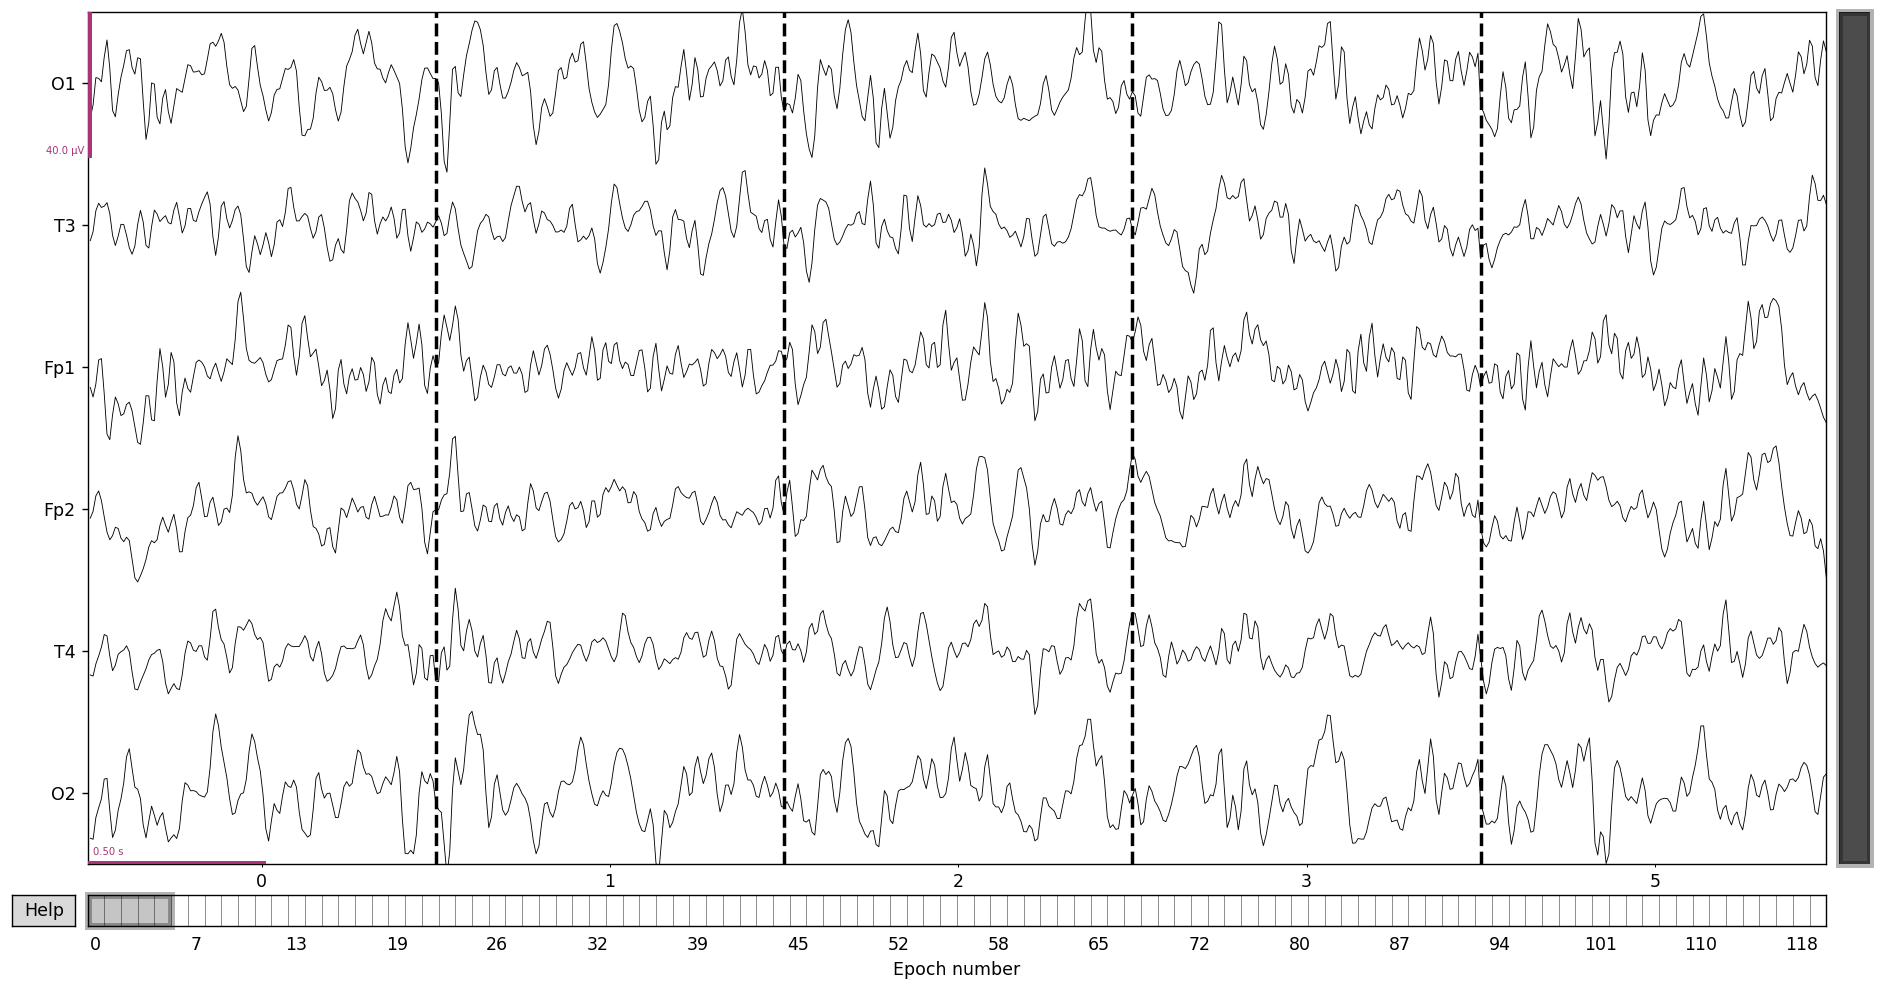

In [17]:
cleaned_epochs[1].plot(n_epochs=5)

In [27]:
# %matplotlib inline

# # Список для хранения очищенных данных
# cleaned_raws = []

# for raw in raws:
#     # Создание экземпляра ICA
#     ica = mne.preprocessing.ICA(n_components=4, random_state=97, max_iter=800)
    
#     # Подгонка ICA к данным
#     ica.fit(raw)
    
#     # Просмотр компонентов ICA для выбора артефактов вручную
#     ica.plot_components()

#     # Задержка выполнения для выбора компонентов вручную (в блокнотах это может быть не нужно)
#     plt.show()  # Эта команда нужна для того, чтобы убедиться, что окно с компонентами отображается
    
#     # Попросить пользователя ввести номера артефактных компонентов
#     selected_components = input("Введите номера артефактных компонентов через запятую (например, 0,1,2): ")
    
#     # Преобразование введенной строки в список целых чисел
#     selected_components = list(map(int, selected_components.split(',')))
    
#     # Исключение выбранных компонентов
#     ica.exclude = selected_components
    
#     # Применение ICA для удаления артефактных компонентов
#     raw_corrected = ica.apply(raw.copy())
    
#     # Добавляем очищенный объект raw в список
#     cleaned_raws.append(raw_corrected)

# # Теперь у вас есть список cleaned_raws, содержащий все очищенные данные

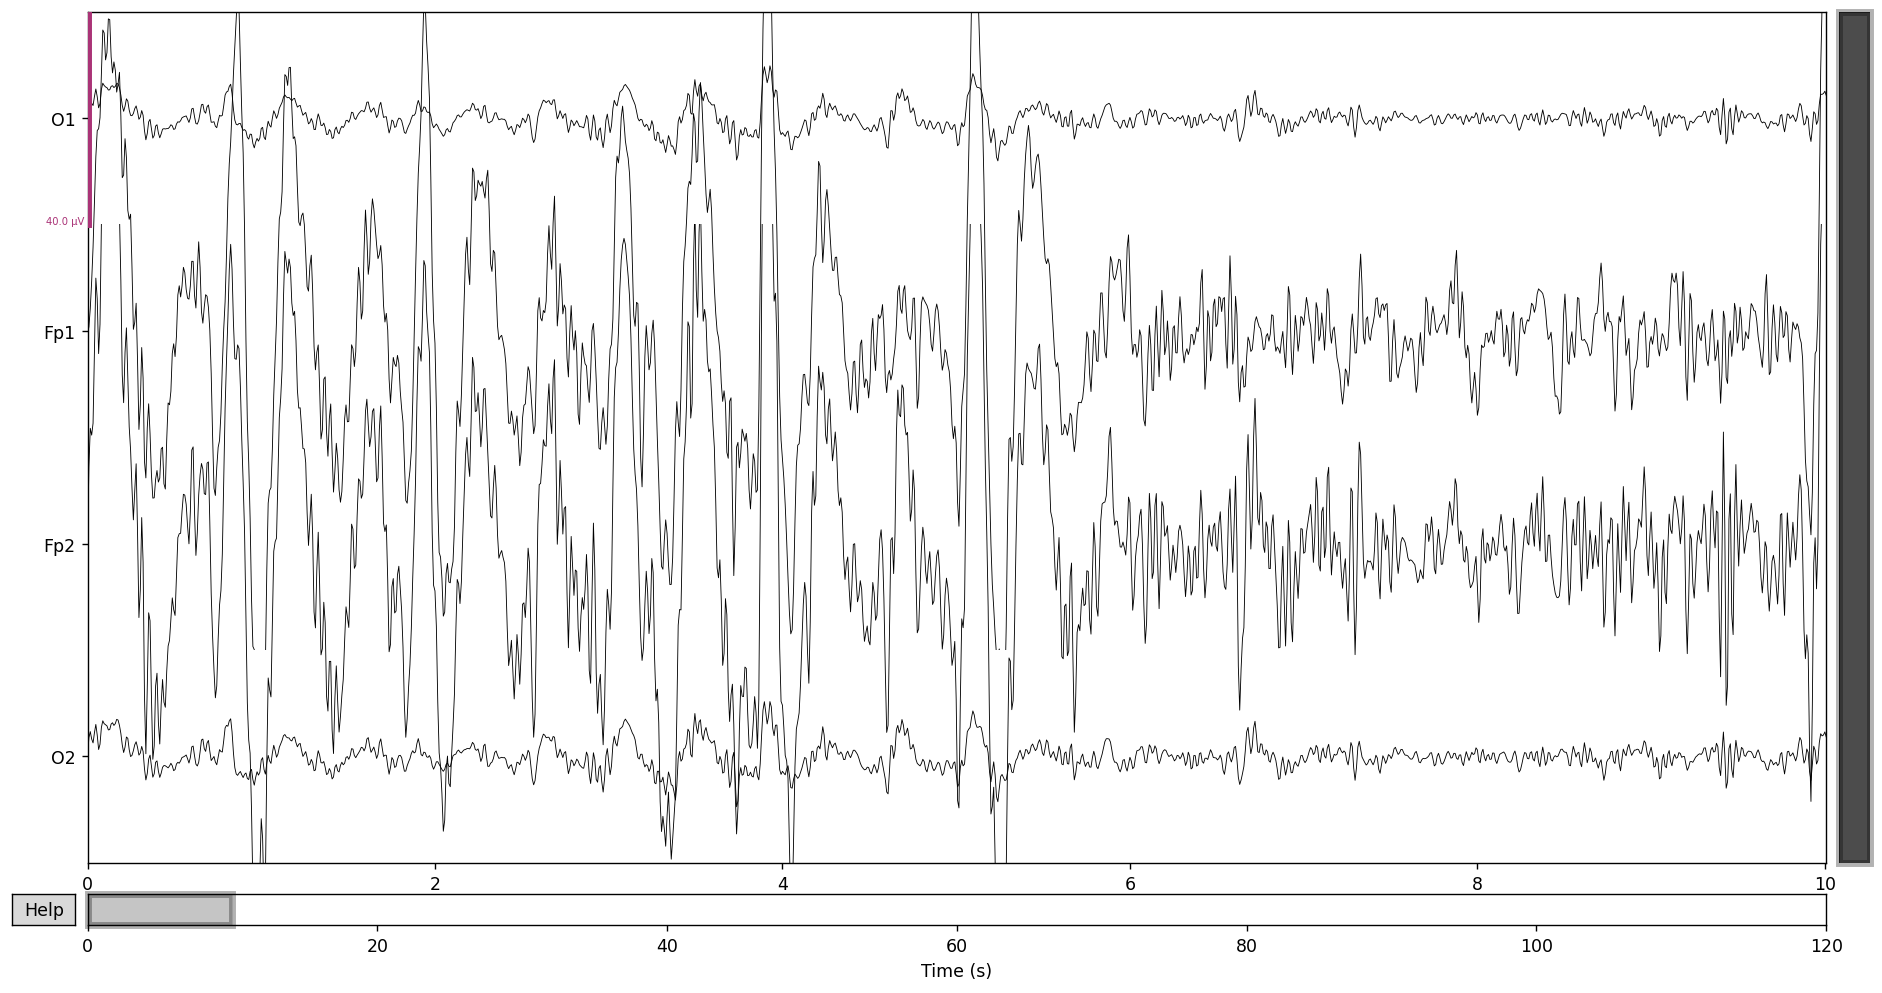

Channels marked as bad:
none


In [22]:
# %matplotlib qt

# cleaned_raws[1].plot()

In [12]:
# cleaned_raws[0]

Measurement date,"August 21, 2024 13:44:08 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,2.00 Hz
Lowpass,40.00 Hz


In [18]:
psds = []

for epochs in cleaned_epochs:
    # Вычисление PSD для данного набора эпох
    psd = epochs.compute_psd(method='multitaper', fmin=2, fmax=30, normalization='length')
    
    # Усреднение PSD по всем эпохам
    mean_psd = psd.get_data().mean(axis=0)  # Размерность (n_channels, n_freqs)
    psds.append(mean_psd)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


In [40]:
freqs

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30.])

In [35]:
freqs = psd.freqs

# Обработка и извлечение диапазона 12-30 Гц
psd_bands = []

freq_mask_alpha = (freqs >= 8) & (freqs <= 12)
freq_mask_beta = (freqs >= 12) & (freqs <= 30)

for psd_mean in psds:
    # Усреднение по частотному диапазону 12-30 Гц для каждого канала
    psd_band_alpha = psd_mean.copy()[:, freq_mask_alpha].mean(axis=-1)  # Размерность (n_channels)
    psd_band_beta = psd_mean.copy()[:, freq_mask_beta].mean(axis=-1)  # Размерность (n_channels)

    psd_bands.append(psd_band_alpha / psd_band_beta)

In [36]:
psd_bands

[array([1.63498317, 1.70527607, 2.18309466, 3.09630936, 2.79533779,
        3.7459522 ]),
 array([2.54796814, 1.82277816, 1.72515905, 2.49906651, 2.03085038,
        2.89844683])]

In [37]:
all_data = np.concatenate(psd_bands)
global_min = np.min(all_data)
global_max = np.max(all_data)

In [39]:
titles = ["Eyes opened", "Eyes opened"]

# Создание фигуры для отображения нескольких топограмм
n_plots = len(psd_bands)
fig, axes = plt.subplots(1, n_plots, figsize=(n_plots * 4, 4))

# Построение топограмм для каждого набора данных
for i, (psd_band, title) in enumerate(zip(psd_bands, titles)):
    # Нормализация текущего массива
    psd_band_normalized = (psd_band - global_min) / (global_max - global_min)
    
    # Выбор оси для текущей топограммы
    ax = axes[i] if n_plots > 1 else axes
    
    # Построение топограммы
    im, cn = mne.viz.plot_topomap(psd_band_normalized, raws[0].info, ch_type='eeg', sensors=True, 
                                  cmap='viridis', show=False, axes=ax, vlim=(0, 1))
    
    ax.set_aspect('equal')  # Сохраняем одинаковое соотношение сторон

    # ax.set_title(title, fontsize=12)
    
# Добавление пространства для colorbar
fig.subplots_adjust(right=0.85)

# Создание отдельной оси для colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height]

# Добавление colorbar на отдельную ось
fig.colorbar(im, cax=cbar_ax)

# Показать все топограммы на одной картинке
plt.show()